In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
%matplotlib inline

In [2]:
def preview_dataset(dataset, num_images=8):
    """
    Displays a grid of images with their class labels.

    Args:
    - dataset: The dataset to preview, e.g., train_dataset.
    - num_images: Number of images to display (default is 8).
    """
    loader = DataLoader(dataset, batch_size=num_images, shuffle=True)
    data_iter = iter(loader)
    images, labels = next(data_iter)
    images = images * torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)
    images = images + torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
    images = torch.clamp(images, 0, 1)

    # Plot images in a grid
    plt.figure(figsize=(12, 6))
    for i in range(num_images):
        ax = plt.subplot(2, num_images // 2, i + 1)
        np_img = images[i].numpy().transpose((1, 2, 0))  # Convert from Tensor to NumPy array
        plt.imshow(np_img)
        plt.title(dataset.classes[labels[i].item()])
        plt.axis("off")
    plt.show()

In [3]:
num_epochs = 25
batch_size = 512
print(batch_size)
learning_rate = 0.001
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

512


In [4]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # ResNet standard input size
    transforms.ToTensor(),
    transforms.RandomInvert(0.8),
    transforms.RandomAdjustSharpness(0.8),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # ImageNet stats
])
train_dataset = datasets.ImageFolder(root="/home/hbdesk/labelstudio_convert/char3_padded/", transform=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

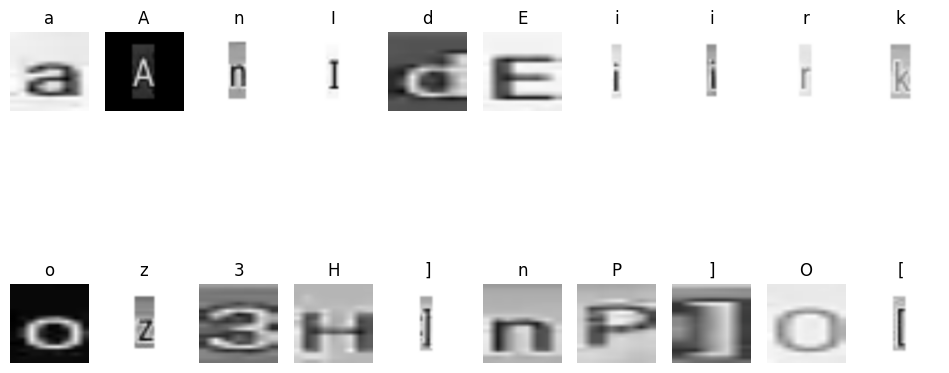

In [5]:
preview_dataset(train_dataset, 20)

In [6]:
print(train_dataset.classes)

['-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', ']', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [7]:
with open('./char_list.txt', 'w') as file:
    file.write('\n'.join(train_dataset.classes))

In [8]:
model = models.resnet34(pretrained=True)
num_classes = len(train_dataset.classes)  # automatically detect number of classes
model.fc = nn.Linear(model.fc.in_features, num_classes)  # Adjust final layer
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


/home/hbdesk/pubg_parser/webui/venv/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/hbdesk/pubg_parser/webui/venv/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [9]:
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in tqdm(train_loader):
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)

    # Calculate and print average loss for the epoch
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

# Save the model checkpoint
torch.save(model.state_dict(), "char_classifierv1.7_224.pth")
print("Training complete. Model saved.")

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:07<00:00,  1.07s/it]


Epoch [1/25], Loss: 2.7933


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:06<00:00,  1.06it/s]


Epoch [2/25], Loss: 0.8497


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:06<00:00,  1.06it/s]


Epoch [3/25], Loss: 0.3065


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:07<00:00,  1.05s/it]


Epoch [4/25], Loss: 0.1294


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:06<00:00,  1.05it/s]


Epoch [5/25], Loss: 0.0632


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:06<00:00,  1.01it/s]


Epoch [6/25], Loss: 0.0292


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:07<00:00,  1.01s/it]


Epoch [7/25], Loss: 0.0231


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:06<00:00,  1.03it/s]


Epoch [8/25], Loss: 0.0156


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:07<00:00,  1.05s/it]


Epoch [9/25], Loss: 0.0132


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:06<00:00,  1.07it/s]


Epoch [10/25], Loss: 0.0084


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:06<00:00,  1.04it/s]


Epoch [11/25], Loss: 0.0104


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:06<00:00,  1.06it/s]


Epoch [12/25], Loss: 0.0153


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:06<00:00,  1.08it/s]


Epoch [13/25], Loss: 0.0076


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:07<00:00,  1.03s/it]


Epoch [14/25], Loss: 0.0108


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:06<00:00,  1.02it/s]


Epoch [15/25], Loss: 0.0099


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:06<00:00,  1.06it/s]


Epoch [16/25], Loss: 0.0150


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:06<00:00,  1.02it/s]


Epoch [17/25], Loss: 0.0149


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:06<00:00,  1.09it/s]


Epoch [18/25], Loss: 0.0072


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:06<00:00,  1.09it/s]


Epoch [19/25], Loss: 0.0090


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:07<00:00,  1.06s/it]


Epoch [20/25], Loss: 0.0043


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:07<00:00,  1.06s/it]


Epoch [21/25], Loss: 0.0049


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:07<00:00,  1.02s/it]


Epoch [22/25], Loss: 0.0045


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:06<00:00,  1.06it/s]


Epoch [23/25], Loss: 0.0023


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:06<00:00,  1.01it/s]


Epoch [24/25], Loss: 0.0019


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:06<00:00,  1.04it/s]

Epoch [25/25], Loss: 0.0013
Training complete. Model saved.


In [10]:
from PIL import Image
import torch
from torchvision import transforms

# Define the image preprocessing transform
preprocess = transforms.Compose([
    transforms.Resize((112, 112)),  # ResNet standard input size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # ImageNet stats
])

# Function to load the trained model
def load_model(model_path, num_classes):
    model = models.resnet34(pretrained=False)
    model.fc = nn.Linear(model.fc.in_features, num_classes)
    model.load_state_dict(torch.load(model_path, map_location="cpu"))
    model.eval()  # Set model to evaluation mode
    return model

# Inference function
def predict(image_path, model, class_names):
    """
    Perform inference on a single image.

    Args:
    - image_path (str): Path to the input image.
    - model (torch.nn.Module): Trained PyTorch model.
    - class_names (list of str): List of class names.

    Returns:
    - str: Predicted class name.
    """
    # Load and preprocess the image
    image = Image.open(image_path).convert("RGB")
    input_tensor = preprocess(image)
    # print(type(input_tensor))
    plt.imshow(input_tensor.view(-1, 224).cpu().numpy())
    plt.show()
    input_batch = input_tensor.unsqueeze(0)  # Create a mini-batch as expected by the model

    # Move the input to the same device as the model
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    input_batch = input_batch.to(device)
    model = model.to(device)

    # Perform inference
    with torch.no_grad():
        output = model(input_batch)
        _, predicted_idx = torch.max(output, 1)

    # Get the class label
    predicted_class = class_names[predicted_idx.item()]
    return predicted_class

# Load the model and class names
model_path = "./char_classifier.pth"
class_names = train_dataset.classes
model = load_model(model_path, num_classes=len(class_names))

# Perform inference on an example image
image_path = "/home/hbdesk/labelstudio_convert/chars/A/275eb429f17647cebf18bc336b709b65.png"  # Replace with your image path
predicted_class = predict(image_path, model, class_names)
print(f"Predicted class: {predicted_class}")

/home/hbdesk/pubg_parser/webui/venv/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/tmp/ipykernel_46619/2057231199.py:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.a

FileNotFoundError: [Errno 2] No such file or directory: './char_classifier.pth'